<h1>机器学习--聚类<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#kmeans" data-toc-modified-id="kmeans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>kmeans</a></span><ul class="toc-item"><li><span><a href="#导入相关库并读取data.csv" data-toc-modified-id="导入相关库并读取data.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>导入相关库并读取data.csv</a></span></li><li><span><a href="#查看相关数据并可视化展示" data-toc-modified-id="查看相关数据并可视化展示-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>查看相关数据并可视化展示</a></span></li><li><span><a href="#导入sklearn的相关库" data-toc-modified-id="导入sklearn的相关库-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>导入sklearn的相关库</a></span></li><li><span><a href="#结果预测" data-toc-modified-id="结果预测-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>结果预测</a></span></li><li><span><a href="#数据校正" data-toc-modified-id="数据校正-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>数据校正</a></span></li></ul></li><li><span><a href="#KNN模型" data-toc-modified-id="KNN模型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KNN模型</a></span></li><li><span><a href="#meanshift" data-toc-modified-id="meanshift-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>meanshift</a></span></li></ul></div>

# kmeans

## 导入相关库并读取data.csv

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


## 查看相关数据并可视化展示

In [3]:
X=data.drop(['labels'],axis=1)
Y = data.loc[:,'labels']

In [4]:
# 查看y的信息频率
pd.value_counts(Y)

2    1156
1     954
0     890
Name: labels, dtype: int64

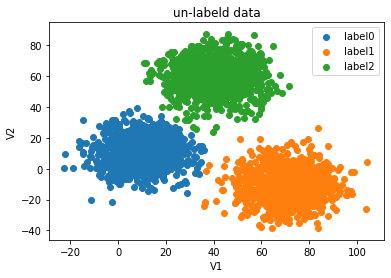

In [5]:
# 可视化数据
from matplotlib import pyplot as plt
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

## 导入sklearn的相关库

In [6]:
from sklearn.cluster import KMeans

In [7]:
# n_clusters=3 为确认3个分类
KM=KMeans(n_clusters=3,random_state=0)
KM.fit(X)

KMeans(n_clusters=3, random_state=0)

In [8]:
# 获得聚类的3个中心点
centers = KM.cluster_centers_
centers

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

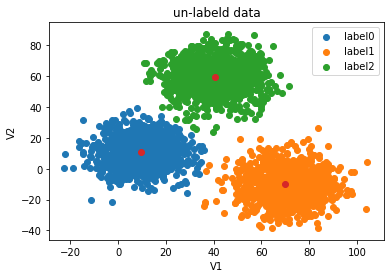

In [9]:
# 图中红色点为中心点
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

## 结果预测

In [10]:
# 结果预测
y_predict_test = KM.predict([[80,60]])
y_predict_test

array([0])

In [11]:
y_predict = KM.predict(X)
pd.value_counts(y_predict)

0    1149
1     952
2     899
dtype: int64

In [12]:
# 查看准确度，由于未一一对应，需要进一步进行校验。
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,y_predict)
accuracy

0.31966666666666665

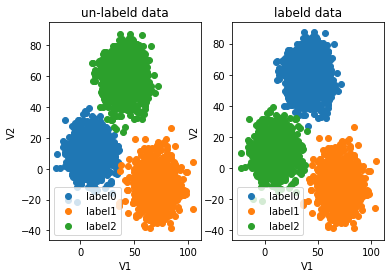

In [13]:
fig3 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))

fig4 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])
plt.title("labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))

plt.show()

## 数据校正

In [14]:
# 进行数据校正
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(2)
    elif i==1:
        y_corrected.append(1)
    else:
        y_corrected.append(0)

In [15]:
pd.value_counts(y_corrected)

2    1149
1     952
0     899
dtype: int64

In [16]:
accuracy_score(y_corrected,Y)

0.997

In [17]:
y_corrected = np.array(y_corrected)

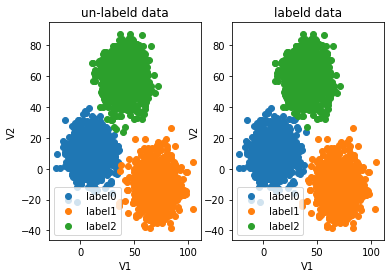

In [18]:
fig5 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][Y==0],X.loc[:,'V2'][Y==0])
label1 = plt.scatter(X.loc[:,'V1'][Y==1],X.loc[:,'V2'][Y==1])
label2 = plt.scatter(X.loc[:,'V1'][Y==2],X.loc[:,'V2'][Y==2])
plt.title("un-labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))

fig6 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected==0],X.loc[:,'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected==1],X.loc[:,'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected==2],X.loc[:,'V2'][y_corrected==2])
plt.title("labeld data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0,label1,label2),('label0','label1','label2'))

plt.show()

# KNN模型

In [19]:
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [22]:
KNN.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [23]:
KNN.predict([[80,60]])

array([2], dtype=int64)

In [25]:
Knn_accuracy = accuracy_score(Y,KNN.predict(X))
Knn_accuracy

1.0

# meanshift

In [26]:
from sklearn.cluster import MeanShift,estimate_bandwidth
bw = estimate_bandwidth(X,n_samples=500)

In [27]:
ms = MeanShift(bandwidth=bw)

In [28]:
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [29]:
y_predict_ms = ms.predict(X)
pd.value_counts(y_predict_ms)

0    1149
1     952
2     899
dtype: int64

In [ ]:
# 同时也需要进行校正，因为是非监督，校正同kmeans中的校正一样